# Steps to Tackle a Time Series Problem (with Codes in Python)
Note: These are just the codes from article

## Loading and Handling TS in Pandas

In [1]:
import pandas as pd
import random
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
#属于ipython的内置magic函数，功能是内嵌绘图，可以省略掉plt.show()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6 #图像显示大小

In [2]:
data = pd.read_csv('AirPassengers.csv')

### Reading as datetime format:

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [4]:
#convert to time series:
ts = data['#Passengers']

In [5]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime

## define function for testing stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, 'bo-',label='Original')
    mean = plt.plot(rolmean, 'ro-', label='Rolling Mean')
    std = plt.plot(rolstd, 'go-', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:DF检验
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

## define function for testing stochastic

In [7]:
#对acf进行q_stat，而不是对原始时间序列进行q_stat
from statsmodels.stats.diagnostic import acorr_ljungbox
def test_stochastic(ts,lag=[6,12]):
    p_value = acorr_ljungbox(ts, lags=lag) #lags可自定义
    print(u'延迟6期的QLB统计量：%f ,对应的P值：%f' % (p_value[0][0],p_value[1][0]))
    print(u'延迟12期的QLB统计量：%f ,对应的P值：%f' % (p_value[0][1],p_value[1][1]))
    if p_value[1][0]>0.1:
        if p_value[1][1]>0.1:
            print('time_series is stochastic')
        else:
            print('time_series is not stochastic')
    else:
        print('time_series is not stochastic')
            
    

## define function for acf and pacf

In [8]:
import statsmodels.api as sm
def acf_plot(timeseries):
    fig=plt.figure(figsize=(12,8))
    ax1=fig.add_subplot(211)
    fig=sm.graphics.tsa.plot_acf(timeseries,lags=80,ax=ax1)

def pacf_plot(timeseries):
    fig=plt.figure(figsize=(12,8))
    ax1=fig.add_subplot(211)
    fig=sm.graphics.tsa.plot_pacf(timeseries,lags=80,ax=ax1)


# Checking for stationarity

## Plot the time-series

In [9]:
#test randomness
test_stochastic(ts)

延迟6期的QLB统计量：575.601854 ,对应的P值：0.000000
延迟12期的QLB统计量：1036.481907 ,对应的P值：0.000000
time_series is not stochastic


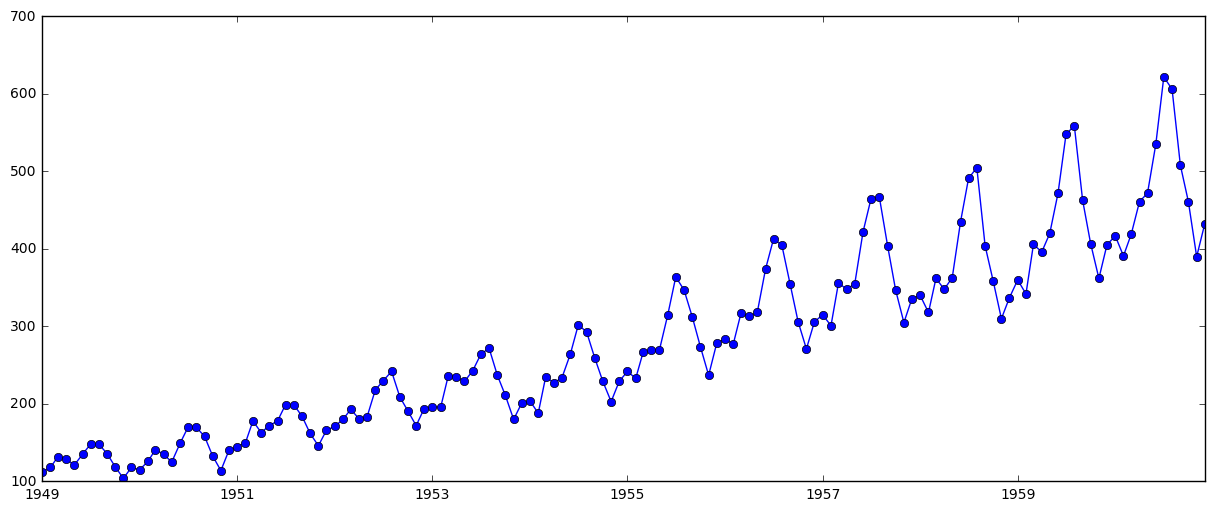

In [10]:
plt.plot(ts,'bo-')#时序图检验

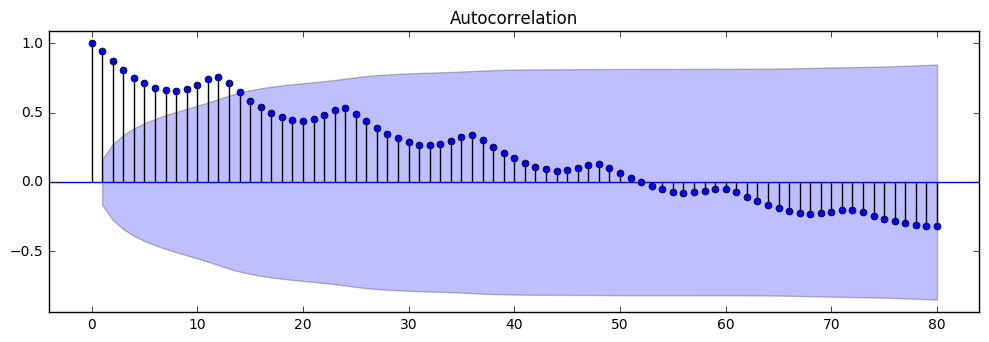

In [11]:
#acf
acf_plot(ts)

## 统计检验方法

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


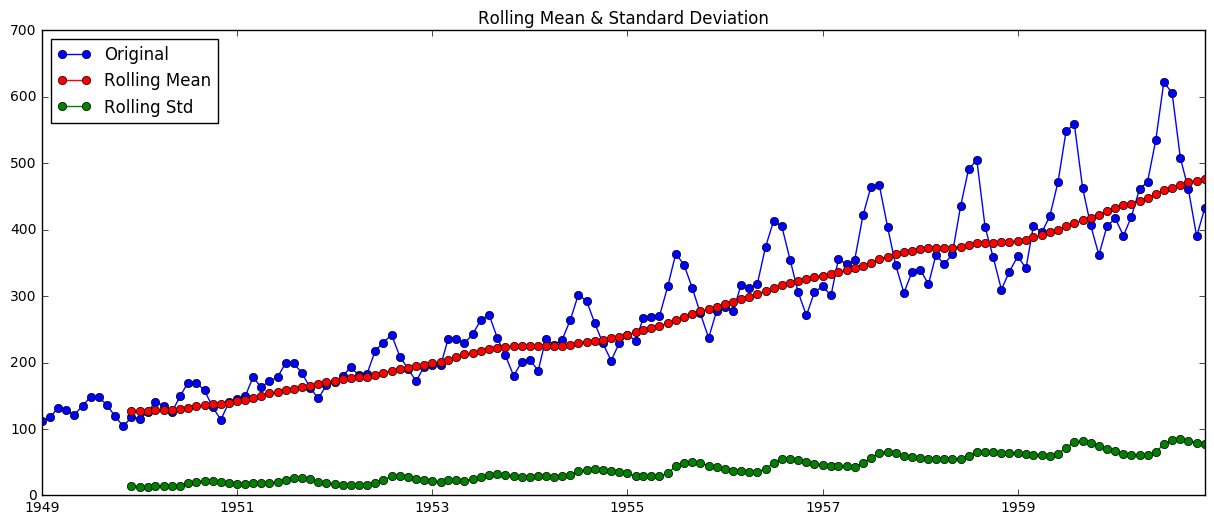

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
Critical Value (1%)             -3.481682
dtype: float64


In [12]:
test_stationarity(ts)

# Making TS Stationary


## Estimating & Eliminating Trend


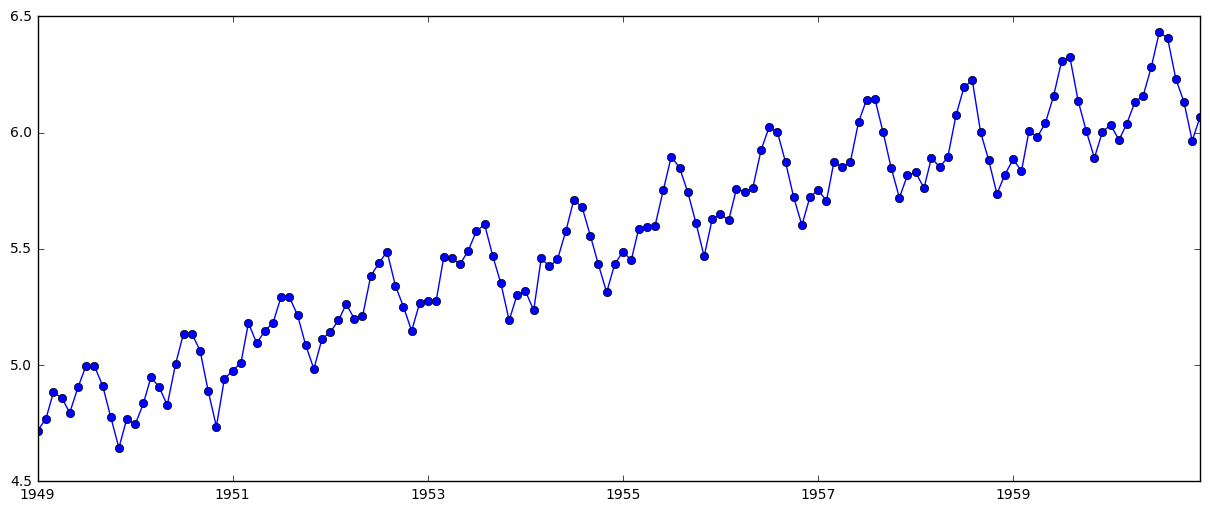

In [13]:
#log smooth
ts_log = np.log(ts)
plt.plot(ts_log,'bo-')

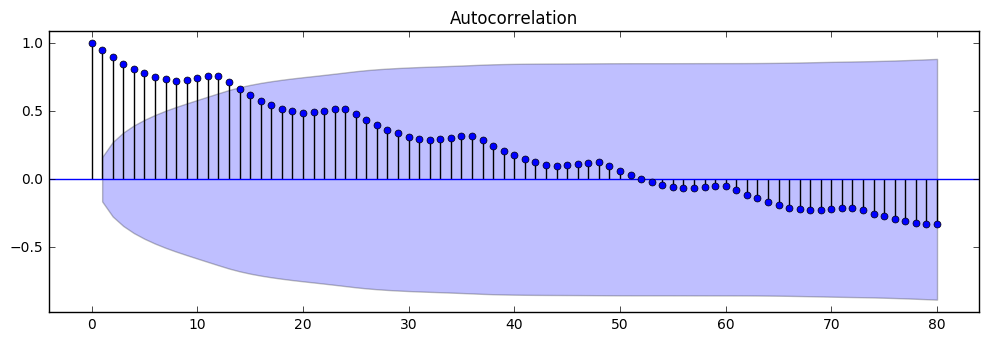

In [14]:
#acf
fig=plt.figure(figsize=(12,8))
ax_2=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_log,lags=80,ax=ax_2)

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


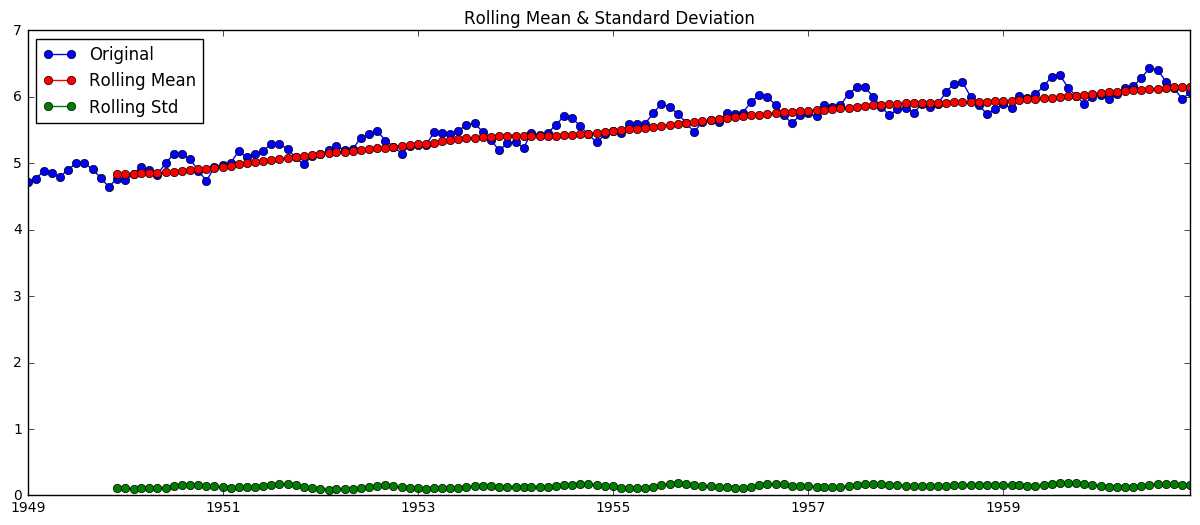

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
Critical Value (1%)             -3.481682
dtype: float64


In [15]:
test_stationarity(ts_log)

## Smoothing:

### Moving average

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  if __name__ == '__main__':


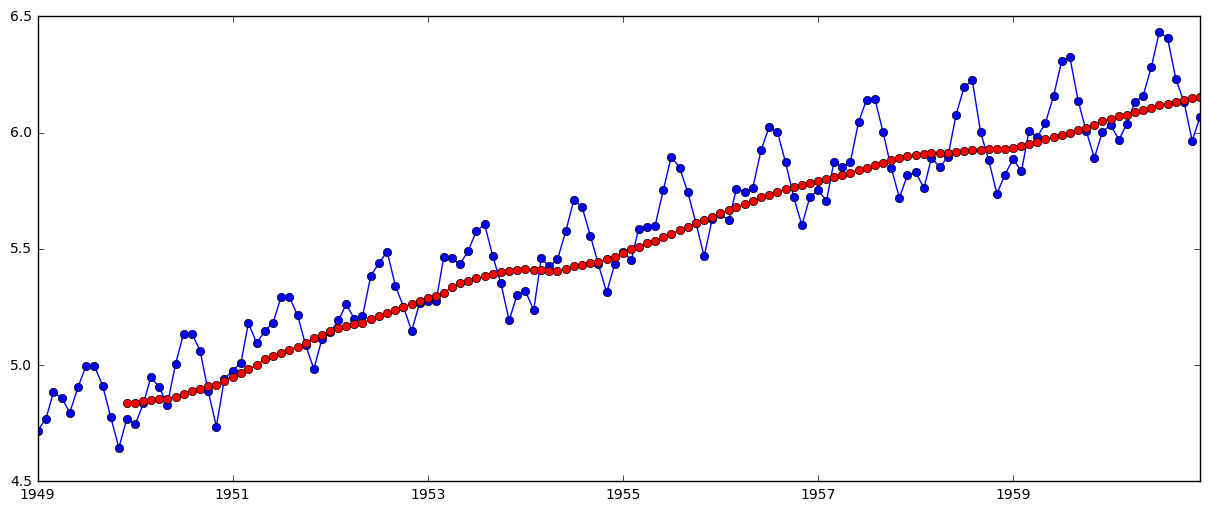

In [16]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log,'bo-')
plt.plot(moving_avg, 'ro-')

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


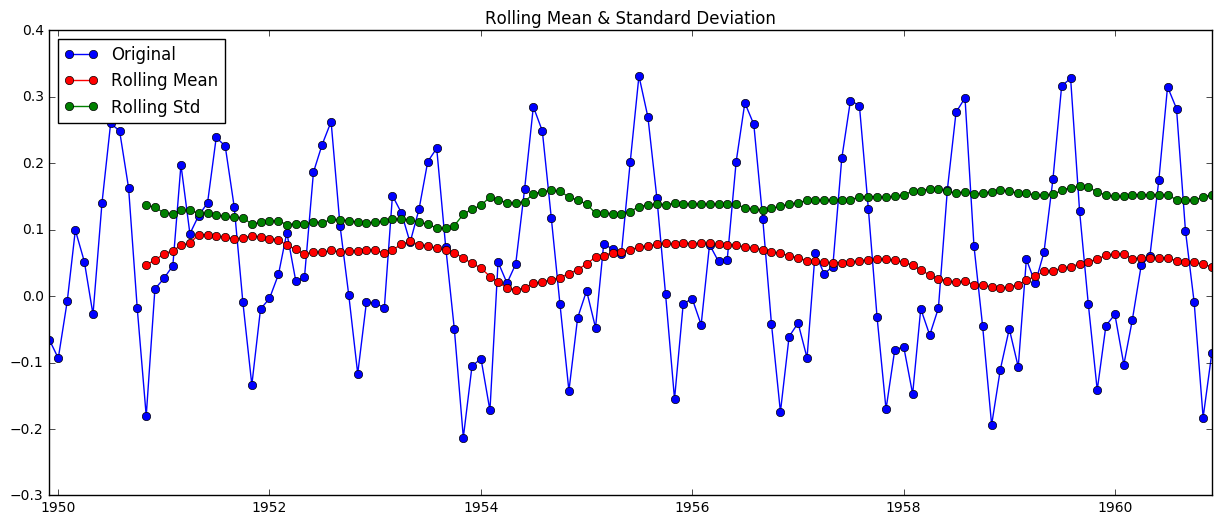

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
Critical Value (1%)             -3.486535
dtype: float64


In [17]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [18]:
test_stochastic(ts_log_moving_avg_diff)

延迟6期的QLB统计量：155.623894 ,对应的P值：0.000000
延迟12期的QLB统计量：370.755827 ,对应的P值：0.000000
time_series is not stochastic


### Exponentially Weighted Moving Average

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(adjust=True,ignore_na=False,min_periods=0,halflife=12).mean()
  if __name__ == '__main__':


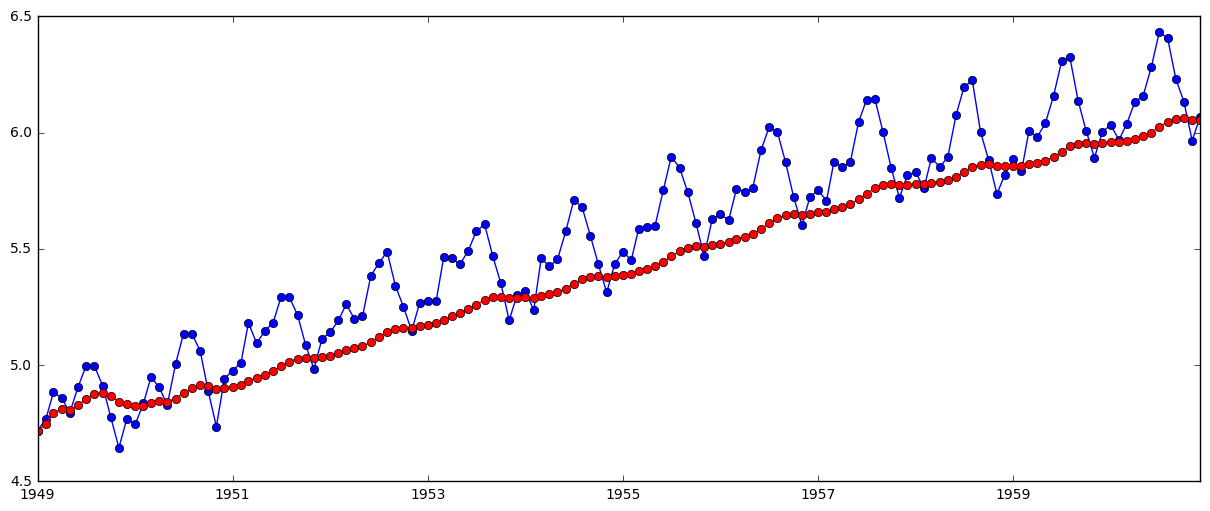

In [19]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log,'bo-')
plt.plot(expwighted_avg, 'ro-')

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


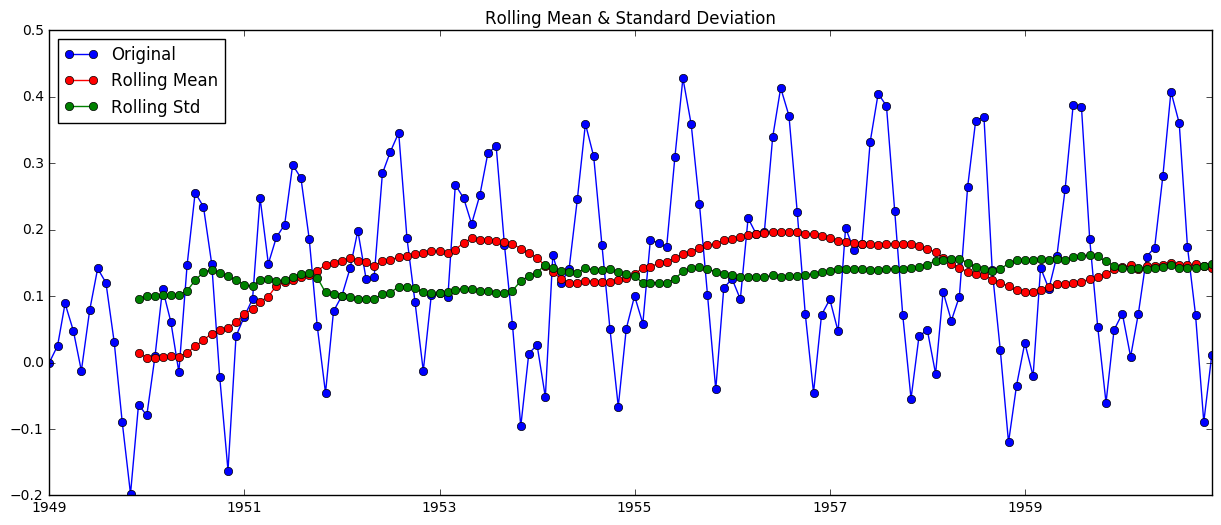

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
Critical Value (1%)             -3.481682
dtype: float64


In [20]:
ts_log_ewma_diff = ts_log - expwighted_avg
ts_log_ewma_diff.dropna(inplace=True)
test_stationarity(ts_log_ewma_diff)

In [21]:
test_stochastic(ts_log_ewma_diff)

延迟6期的QLB统计量：125.889594 ,对应的P值：0.000000
延迟12期的QLB统计量：317.318764 ,对应的P值：0.000000
time_series is not stochastic


## Eliminating Trend and Seasonality

### Differencing:
#### trend

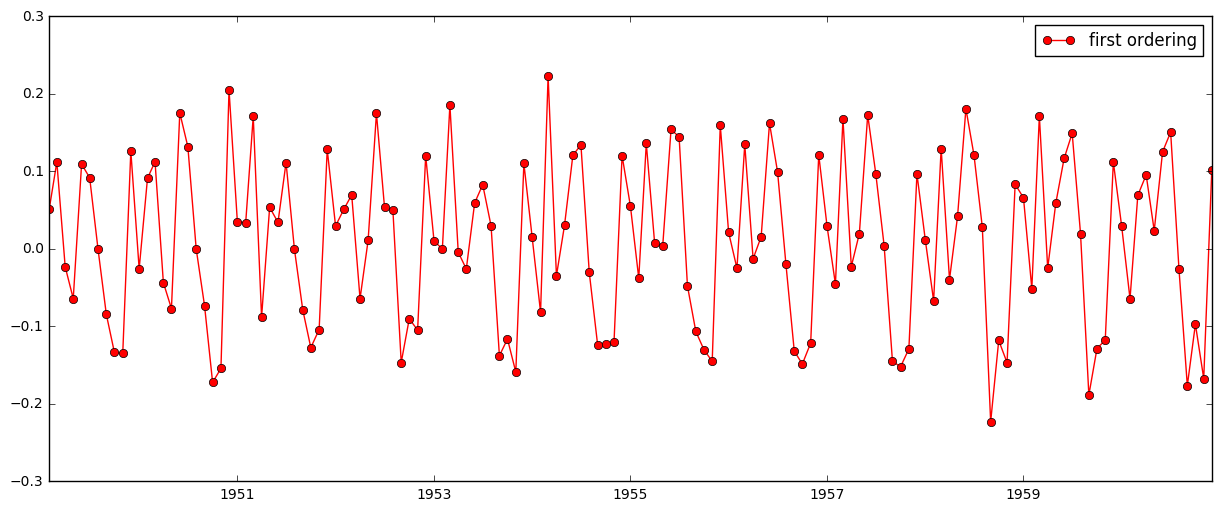

In [22]:
#Take first difference:
ts_log_diff_1 = ts_log.diff(1)
plt.plot(ts_log_diff_1,'ro-',label='first ordering')
plt.legend(loc='best')
plt.show(block=False)

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


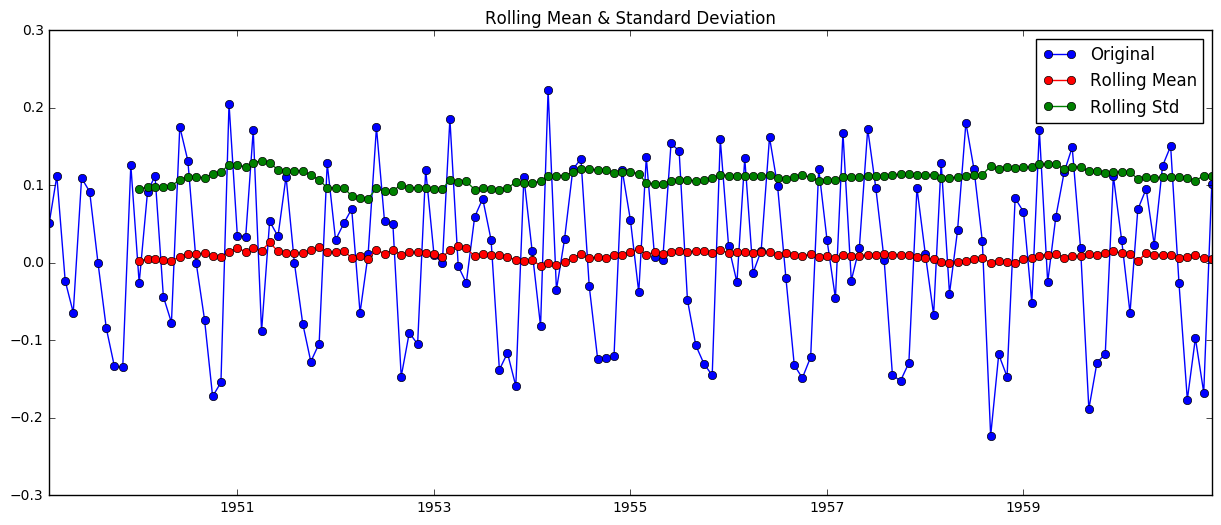

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
Critical Value (1%)             -3.482501
dtype: float64


In [23]:
ts_log_diff_1.dropna(inplace=True)
test_stationarity(ts_log_diff_1)

In [24]:
test_stochastic(ts_log_diff_1)

延迟6期的QLB统计量：27.948515 ,对应的P值：0.000096
延迟12期的QLB统计量：169.890017 ,对应的P值：0.000000
time_series is not stochastic


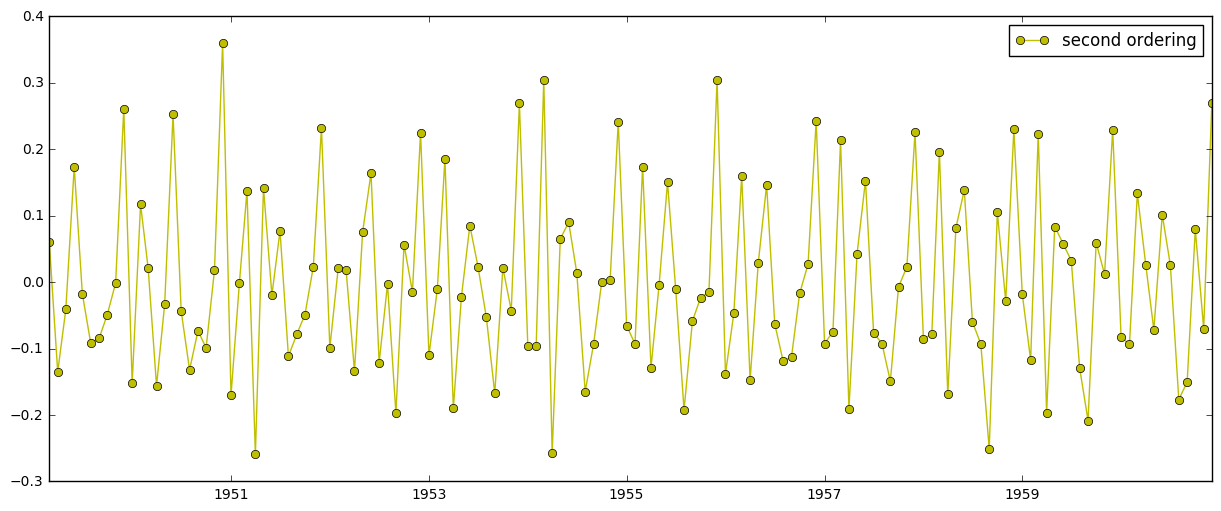

In [25]:
#Take second difference:
ts_log_diff_2= ts_log_diff_1.diff(1)
plt.plot(ts_log_diff_2,'yo-',label='second ordering')
plt.legend(loc='best')
plt.show(block=False)

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


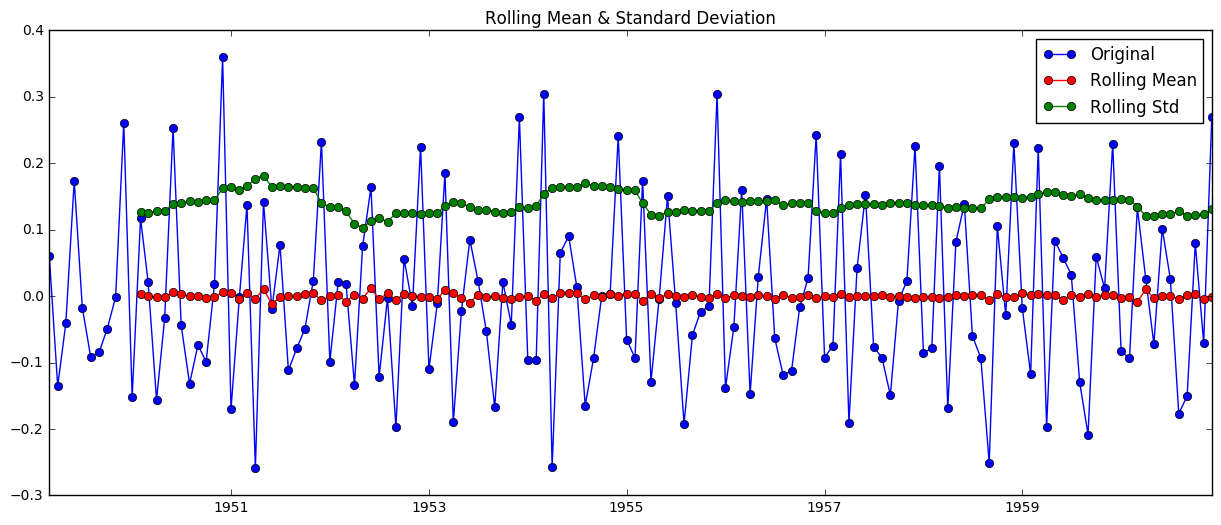

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
Critical Value (1%)           -3.482501e+00
dtype: float64


In [26]:
ts_log_diff_2.dropna(inplace=True)
test_stationarity(ts_log_diff_2)

In [27]:
test_stochastic(ts_log_diff_2)

延迟6期的QLB统计量：33.429086 ,对应的P值：0.000009
延迟12期的QLB统计量：158.470203 ,对应的P值：0.000000
time_series is not stochastic


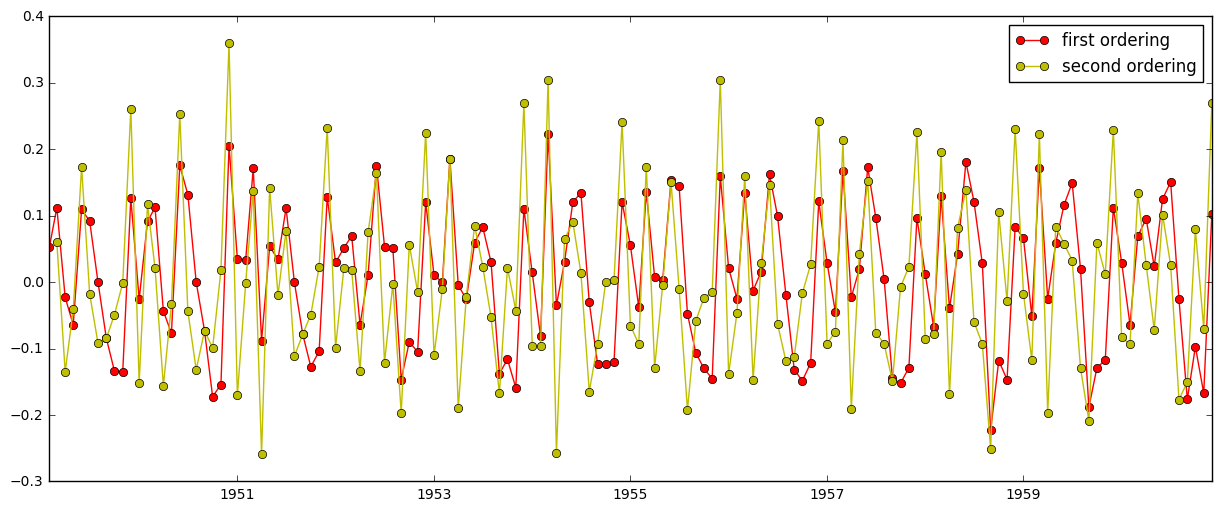

In [61]:
#comparison:
plt.plot(ts_log_diff_1,'ro-',label='first ordering')
plt.plot(ts_log_diff_2,'yo-',label='second ordering')
plt.legend(loc='best')
plt.show(block=False)

## Period，12步差分，周期性规律，周期为12个月

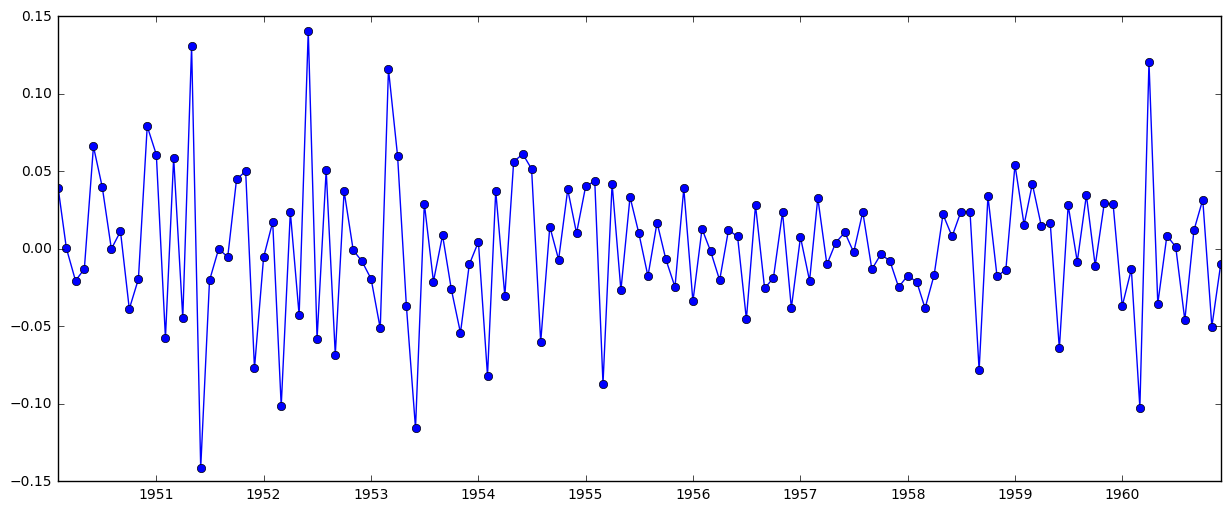

In [32]:
ts_log_diff_1_12_step=ts_log_diff_1.diff(12)
plt.plot(ts_log_diff_1_12_step,'bo-')

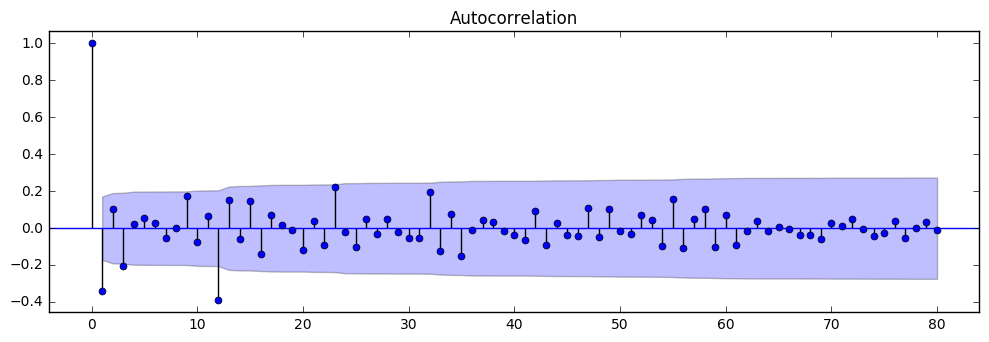

In [62]:
acf_plot(ts_log_diff_1_12_step)

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


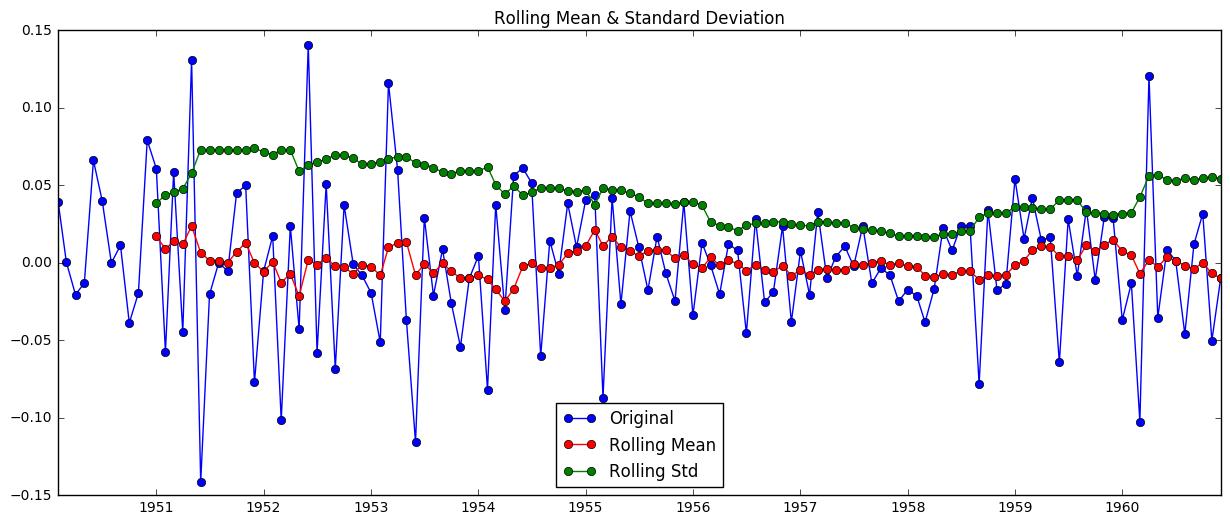

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
Critical Value (1%)             -3.487022
dtype: float64


In [63]:
ts_log_diff_1_12_step.dropna(inplace=True)
test_stationarity(ts_log_diff_1_12_step)

In [64]:
test_stochastic(ts_log_diff_1_12_step)

延迟6期的QLB统计量：23.270941 ,对应的P值：0.000711
延迟12期的QLB统计量：51.472840 ,对应的P值：0.000001
time_series is not stochastic


### Decomposition:

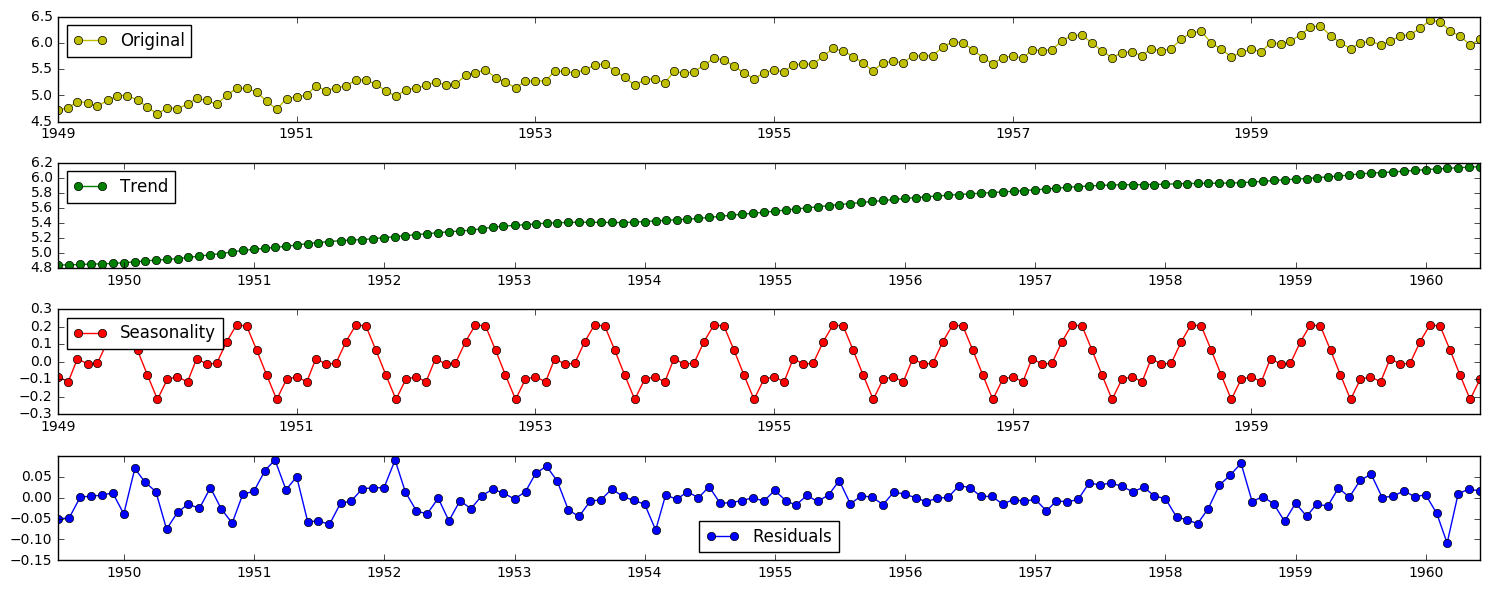

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log,'yo-',label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, 'go-',label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,'ro-',label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, 'bo-',label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


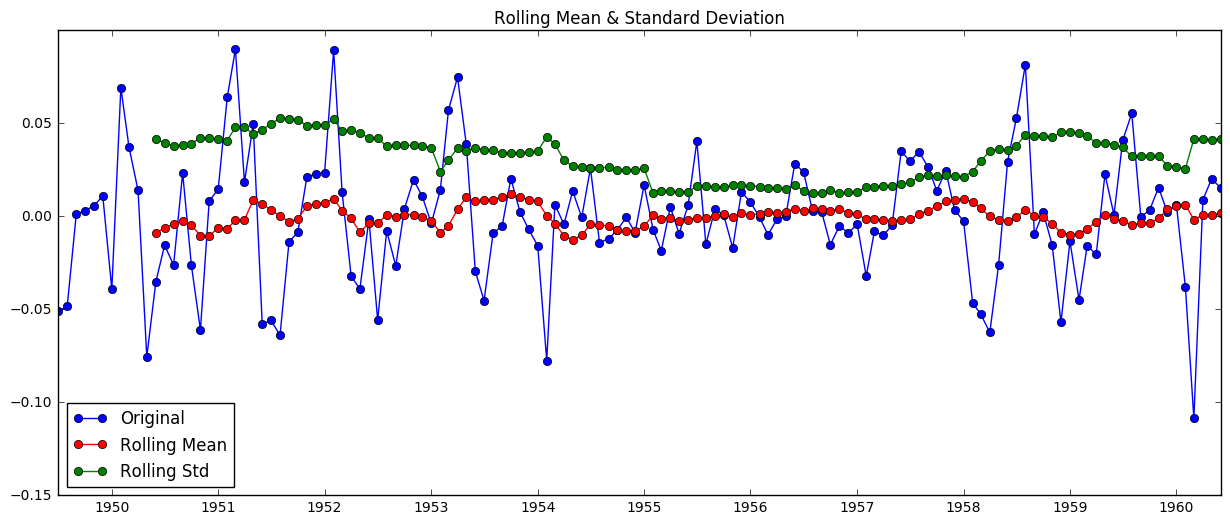

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
Critical Value (1%)           -3.485122e+00
dtype: float64


In [39]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [67]:
test_stochastic(ts_log_decompose)

延迟6期的QLB统计量：60.113002 ,对应的P值：0.000000
延迟12期的QLB统计量：93.251528 ,对应的P值：0.000000
time_series is not stochastic


# Final Forecasting

## First Ordering

In [41]:
from statsmodels.tsa.arima_model import ARIMA

### ARIMA Model:

In [42]:
#grid search 定阶（P,Q）
pmax = 8
qmax = 8
bic_matrix = []
for p in range(pmax +1):
    temp= []
    for q in range(qmax+1):
        try:
            temp.append(ARIMA(ts_log, (p, 1, q)).fit().bic)
        except:
            temp.append(None)
    bic_matrix.append(temp)
print(bic_matrix)
bic_matrix = pd.DataFrame(bic_matrix)   #将其转换成Dataframe 数据结构
p,q = bic_matrix.stack().idxmin()   #先使用stack 展平， 然后使用 idxmin 找出最小值的位置
print(u'BIC 最小的p值 和 q 值：%s,%s' %(p,q))  #  BIC 最小的p值 和 q 值：0,1
#所以可以建立ARIMA 模型，ARIMA(0,1,1)
model = ARIMA(ts_log, (p,1,q)).fit()

model.summary2()        #生成一份模型报告
model.forecast(5)   #为未来5天进行预测， 返回预测结果， 标准误差， 和置信区间

F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_

F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_

[[-225.63920574177396, -228.61878109476228, -228.52757549921046, -243.07602032002973, -259.38657271839656, -258.45432760606718, -262.57329338514529, -257.62667973742236, None], [-226.49736499185266, -229.75633550508223, -250.37546744370428, -245.45624857284733, -254.72173659267938, -261.61119763563357, -257.54559747664803, -255.05556979061845, -268.53926437056873], [-225.75325717648843, -255.33699190843009, -269.5037401401454, -259.20744596041311, None, -260.04564671209596, None, -257.25470735919851, -274.2262274611719], [-222.13756163848751, -252.30803307010851, -249.41868665594885, -265.77077720924382, -264.74028734763465, -259.76183327279961, -258.16864905565615, -254.853184679576, -270.54990957613057], [-232.95792754340854, -253.67072277012713, -253.12264412710732, -276.59664482817948, -271.01270760469873, None, -297.97066106924808, -300.26452478889797, -271.7721090738072], [-228.00571081477634, -249.08921656828733, -247.37787826822989, -271.23278569291978, -268.28358176978008, -25

F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(array([ 6.15279595,  6.12277282,  6.13322545,  6.18838738,  6.31927961]),
 array([ 0.04589108,  0.05300584,  0.05519027,  0.05947449,  0.06378729]),
 array([[ 6.06285108,  6.24274081],
        [ 6.01888327,  6.22666236],
        [ 6.0250545 ,  6.2413964 ],
        [ 6.07181951,  6.30495524],
        [ 6.19425881,  6.4443004 ]]))

F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\anaconda\application\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


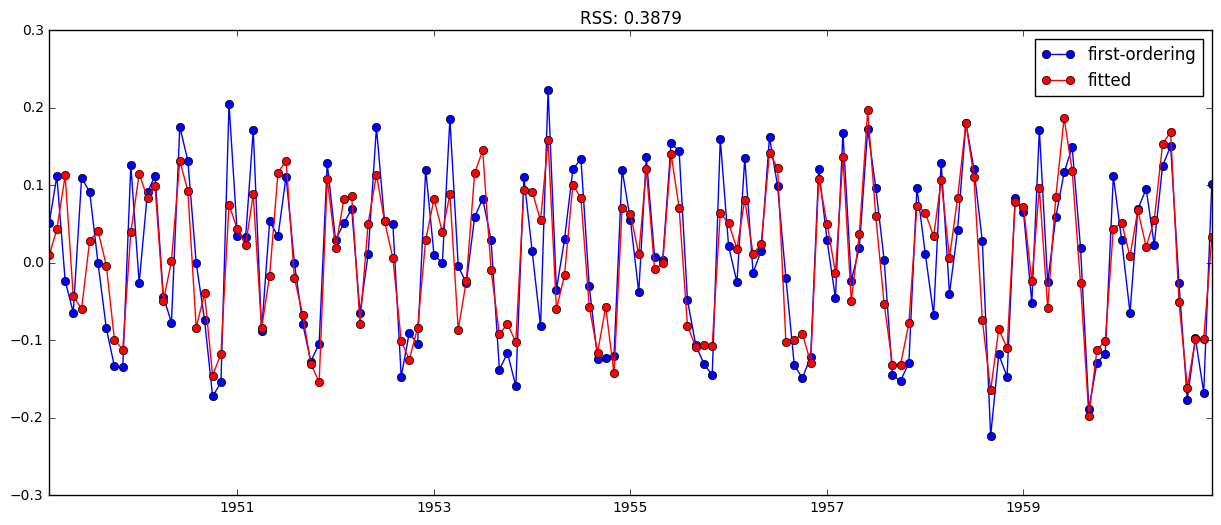

In [43]:
model = ARIMA(ts_log, order=(8, 1, 7))  
results_ARIMA = model.fit(disp=-1)  #return   statsmodels.tsa.arima.ARIMAResults class
#ARIMAResults class有很多方法，其中一些方法可以查看ARIMA模型的具体参数值
# http://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_model.ARIMAResults.html
plt.plot(ts_log_diff_1,'bo-',label='first-ordering')
plt.legend(loc='best')
plt.plot(results_ARIMA.fittedvalues, 'ro-',label='fitted')
plt.legend(loc='best')

plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff_1)**2))

In [68]:
test_stochastic(results_ARIMA.resid)

延迟6期的QLB统计量：25.231115 ,对应的P值：0.000309
延迟12期的QLB统计量：70.394171 ,对应的P值：0.000000
time_series is not stochastic


### Convert to original scale:

In [45]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009963
1949-03-01    0.043587
1949-04-01    0.112849
1949-05-01   -0.042989
1949-06-01   -0.059138
dtype: float64


In [46]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009963
1949-03-01    0.053549
1949-04-01    0.166398
1949-05-01    0.123409
1949-06-01    0.064271
dtype: float64


In [47]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728462
1949-03-01    4.772048
1949-04-01    4.884897
1949-05-01    4.841908
dtype: float64

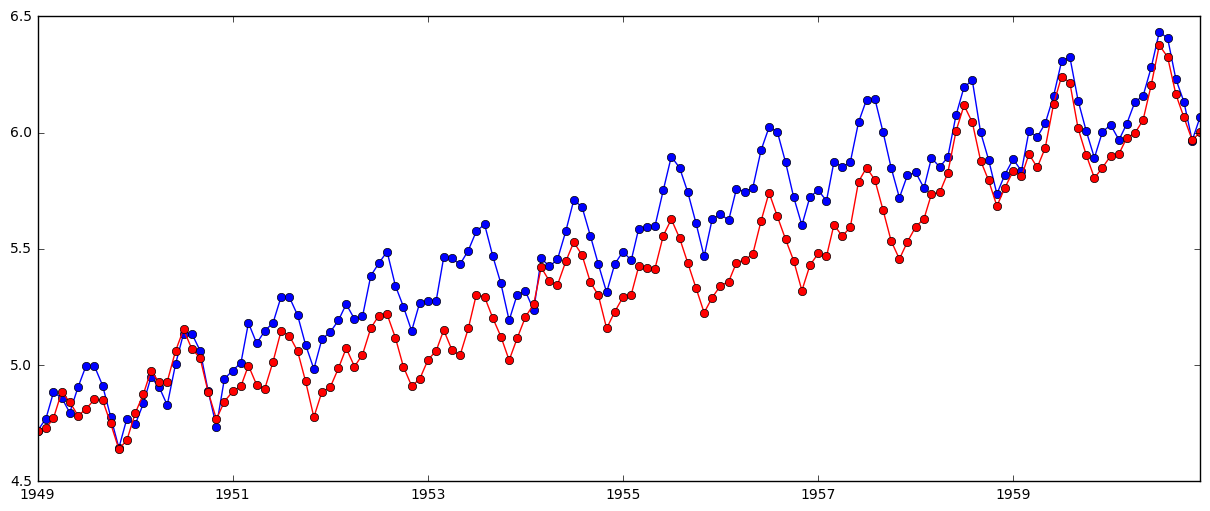

In [48]:
plt.plot(ts_log,'bo-')
plt.plot(predictions_ARIMA_log,'ro-')

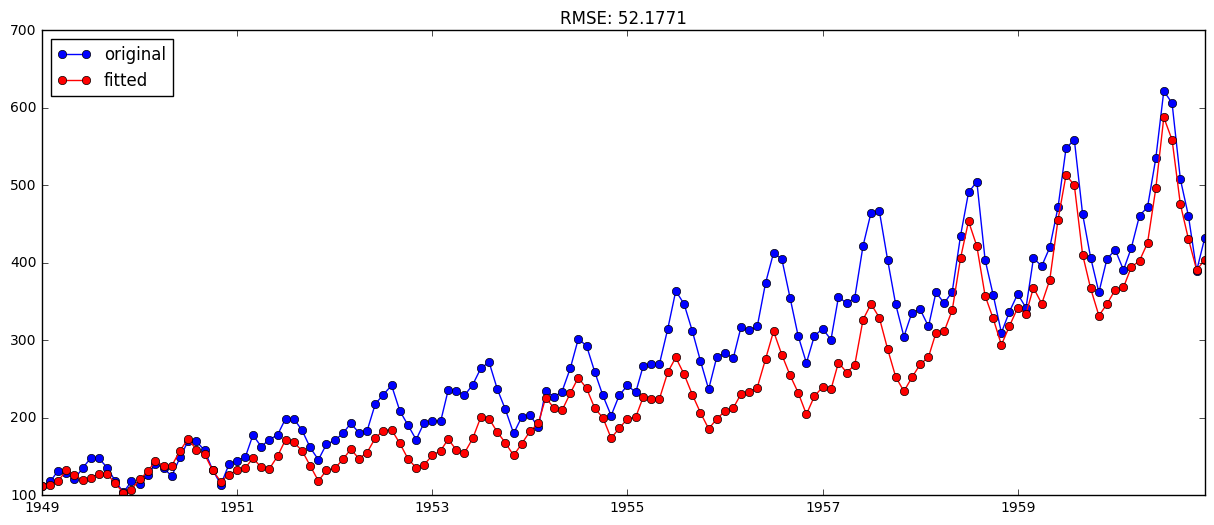

In [49]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts,'bo-',label='original')
plt.legend(loc='best')
plt.plot(predictions_ARIMA,'ro-',label='fitted')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
trend.dropna(inplace=True)

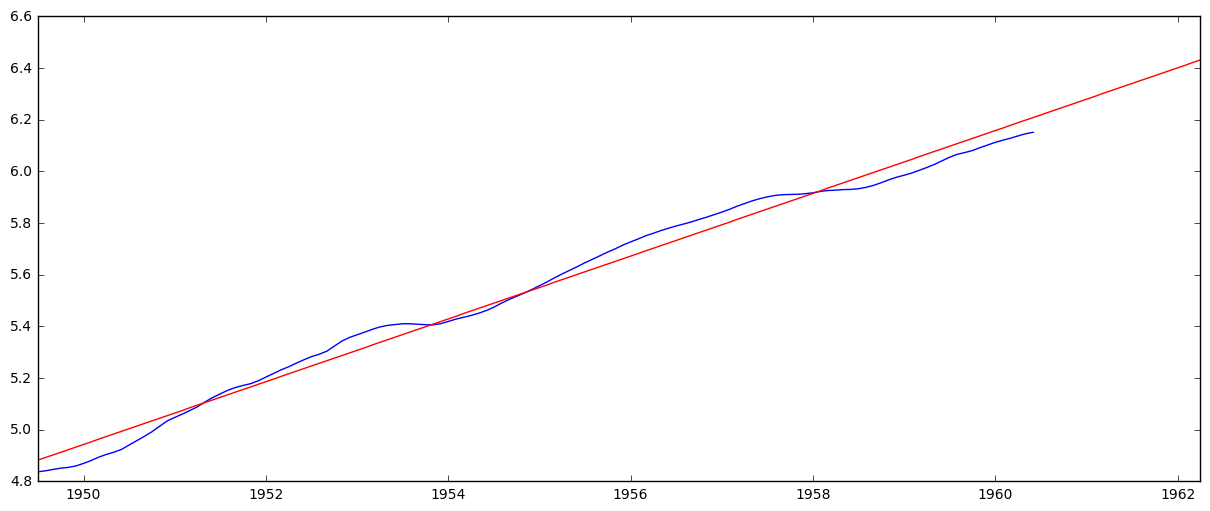

In [52]:
x=pd.Series(range(trend.size),index=trend.index)
x=x.to_frame()
linreg=LinearRegression()
linereg=linreg.fit(x,trend)
x=pd.Series(range(0,154),index=(pd.period_range('1949-07',periods=154,freq='M')))
x=x.to_frame()
res_predict=linereg.predict(x)
trend2=pd.Series(res_predict,index=x.index).to_timestamp()
plt.plot(trend,color='blue')
plt.plot(trend2,color='red')

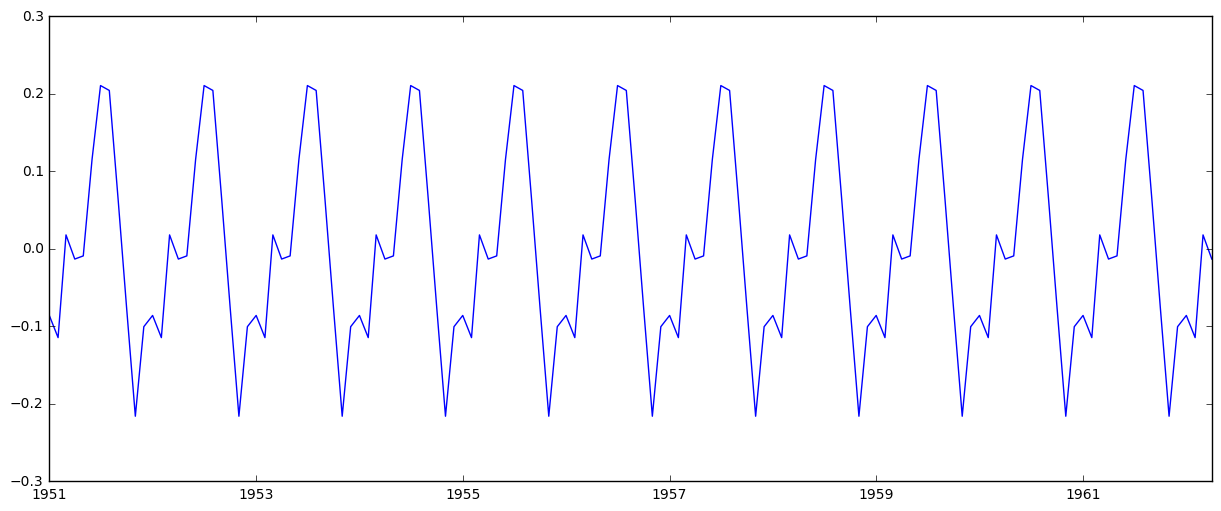

In [53]:
index1=pd.period_range('1949-01',periods=160,freq='M')
index1=index1.to_datetime()
seasonal=seasonal.reindex(index1)
seasonal=seasonal.shift(24)
plt.plot(seasonal)

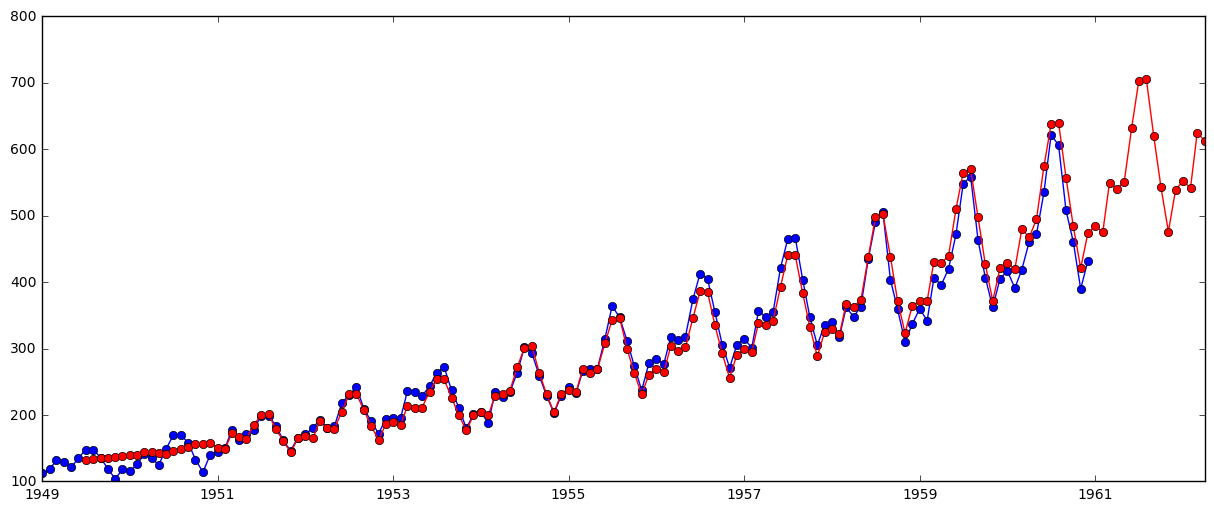

In [60]:
model_ARIMA_1=ARIMA(residual,(2,0,2)).fit(disp=-1,method='css')
predictions_ARIMA_1=model_ARIMA_1.predict(start='1950-01',end='1962-04')
predictions_ARIMA_1=predictions_ARIMA_1.add(trend2,fill_value=0).add(seasonal,fill_value=0)
predictions_ARIMA_1=np.exp(predictions_ARIMA_1)
plt.plot(ts,'bo-')
plt.plot(predictions_ARIMA_1,'ro-')

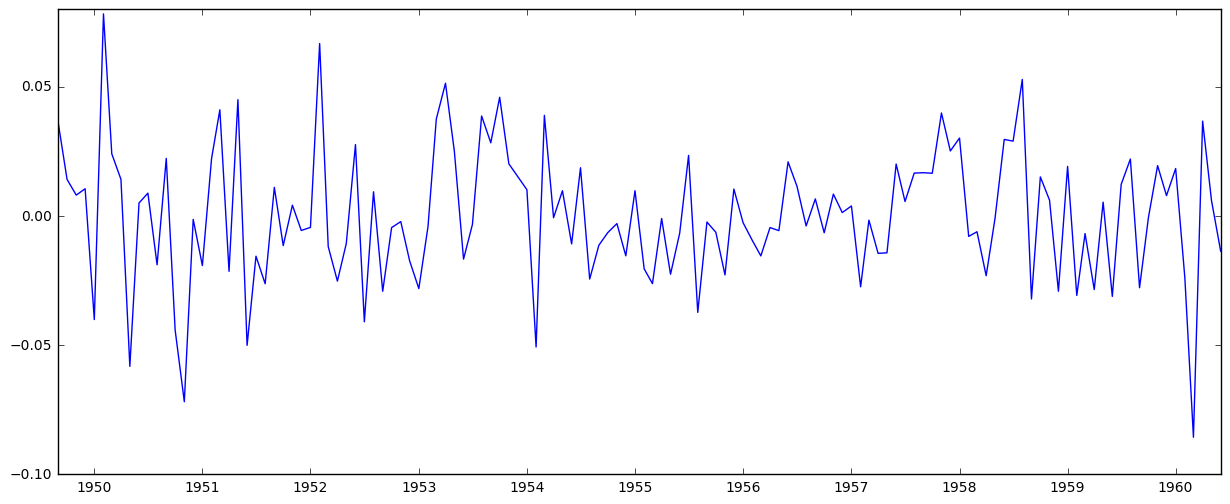

In [55]:
plt.plot(model_ARIMA_1.resid)

F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
F:\anaconda\application\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


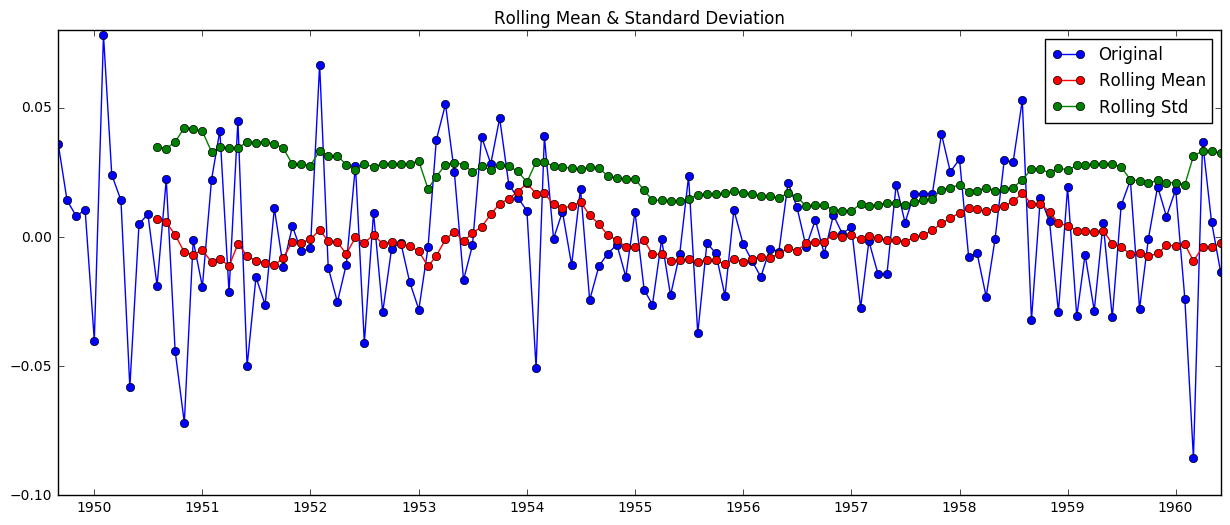

Results of Dickey-Fuller Test:
Test Statistic                -1.151680e+01
p-value                        4.131384e-21
#Lags Used                     0.000000e+00
Number of Observations Used    1.290000e+02
Critical Value (5%)           -2.884219e+00
Critical Value (10%)          -2.578864e+00
Critical Value (1%)           -3.482088e+00
dtype: float64


In [56]:
test_stationarity(model_ARIMA_1.resid)

In [57]:
test_stochastic(model_ARIMA_1.resid)

延迟6期的QLB统计量：4.232376 ,对应的P值：0.645262
延迟12期的QLB统计量：8.417797 ,对应的P值：0.751688
time_series is stochastic
